In [1]:
!wget https://datashare.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz

--2024-09-29 05:22:28--  https://datashare.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz
Resolving datashare.ed.ac.uk (datashare.ed.ac.uk)... 129.215.67.172
Connecting to datashare.ed.ac.uk (datashare.ed.ac.uk)|129.215.67.172|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 687544992 (656M) [application/gzip]
Saving to: ‘CINIC-10.tar.gz’

CINIC-10.tar.gz     100%[===================>] 655.69M  1.18MB/s    in 5m 43s  

2024-09-29 05:28:13 (1.91 MB/s) - ‘CINIC-10.tar.gz’ saved [687544992/687544992]



In [2]:
!tar -xvzf CINIC-10.tar.gz

Streaming output truncated to the last 5000 lines.
valid/truck/n03896419_1446.png
valid/truck/n03796401_4733.png
valid/truck/n03796401_478.png
valid/truck/n03796401_4815.png
valid/truck/n03796401_4868.png
valid/truck/n03796401_492.png
valid/truck/n03796401_5035.png
valid/truck/n03796401_5053.png
valid/truck/n03796401_5071.png
valid/truck/n03796401_5116.png
valid/truck/n03796401_5310.png
valid/truck/n03796401_5323.png
valid/truck/n03796401_5338.png
valid/truck/n03796401_5357.png
valid/truck/n03796401_5376.png
valid/truck/n03796401_538.png
valid/truck/n03796401_5729.png
valid/truck/n03796401_5736.png
valid/truck/n03796401_5843.png
valid/truck/n03796401_6098.png
valid/truck/n03796401_6228.png
valid/truck/n03796401_6402.png
valid/truck/n03796401_6410.png
valid/truck/n03796401_6453.png
valid/truck/n03796401_6503.png
valid/truck/n03796401_6531.png
valid/truck/n03796401_6574.png
valid/truck/n03796401_6727.png
valid/truck/n03796401_6763.png
valid/truck/n03796401_6772.png
valid/truck/n03796401_

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
train_data_dir = '/content/train'
valid_data_dir = '/content/valid'
test_data_dir = '/content/test'

In [13]:
# Data augmentation and normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values
    rotation_range=15,      # Data augmentation: rotate images
    width_shift_range=0.1,  # Shift horizontally
    height_shift_range=0.1, # Shift vertically
    horizontal_flip=True    # Flip images horizontally
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize for validation
test_datagen = ImageDataGenerator(rescale=1./255)   # Only normalize for testing

In [14]:
# Constants for data preprocessing and model
IMAGE_SIZE = (32, 32)
BATCH_SIZE = 32
CLASS_MODE = 'categorical'

In [15]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

# Load validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False  # Keep order for confusion matrix later
)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 20

METRICS = ['accuracy',
           Precision(name='precision'),
           Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

# Train the model
training_history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=valid_generator.samples // BATCH_SIZE
)

Epoch 1/20
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 139s 49ms/step - accuracy: 0.4342 - loss: 1.5473 - precision: 0.6613 - recall: 0.1871 - val_accuracy: 0.4931 - val_loss: 1.3904 - val_precision: 0.6855 - val_recall: 0.3084
Epoch 2/20
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - accuracy: 0.6562 - loss: 1.0145 - precision: 1.0000 - recall: 0.3750 - val_accuracy: 0.4375 - val_loss: 1.3038 - val_precision: 0.5714 - val_recall: 0.2500
Epoch 3/20
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 133s 47ms/step - accuracy: 0.4920 - loss: 1.4010 - precision: 0.6942 - recall: 0.2796 - val_accuracy: 0.5450 - val_loss: 1.2663 - val_precision: 0.7238 - val_recall: 0.3635
Epoch 4/20
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.5312 - loss: 1.2034 - precision: 0.7333 - recall: 0.3438 - val_accuracy: 0.8750 - val_loss: 0.6258 - val_precision: 0.8462 - val_recall: 0.6875
Epoch 5/20
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 133s 47ms/step - accuracy: 0.5196 - loss: 1.3228 - precision: 0.7042 - recall: 0.3238 - val_accuracy: 

In [20]:
epochs = range(1, EPOCHS + 1)
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
precision = training_history.history['precision']
val_precision = training_history.history['val_precision']
recall = training_history.history['recall']
val_recall = training_history.history['val_recall']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

# Create a list to hold metrics at 5-epoch intervals
metrics_list = []

for epoch in range(4, EPOCHS, 5):
    metrics = {
        'Epoch': epoch + 1,
        'Loss': loss[epoch],
        'Val_Loss': val_loss[epoch],
        'Accuracy': accuracy[epoch],
        'Val_Accuracy': val_accuracy[epoch],
        'Precision': precision[epoch],
        'Val_Precision': val_precision[epoch],
        'Recall': recall[epoch],
        'Val_Recall': val_recall[epoch]
    }
    metrics_list.append(metrics)

# Create a DataFrame from the metrics
df_metrics = pd.DataFrame(metrics_list)
print("\nTraining Metrics Every 5 Epochs:")
df_metrics


Training Metrics Every 5 Epochs:


,Epoch,Loss,Val_Loss,Accuracy,Val_Accuracy,Precision,Val_Precision,Recall,Val_Recall
0,5,1.317125,1.355016,0.521597,0.530139,0.707965,0.691530,0.329573,0.387080
1,10,1.027525,1.131457,0.562500,0.625000,0.777778,0.833333,0.437500,0.625000
2,15,1.177967,1.158876,0.574304,0.580781,0.732871,0.727352,0.413869,0.434533
3,20,1.082972,1.250909,0.500000,0.687500,0.636364,0.666667,0.437500,0.375000


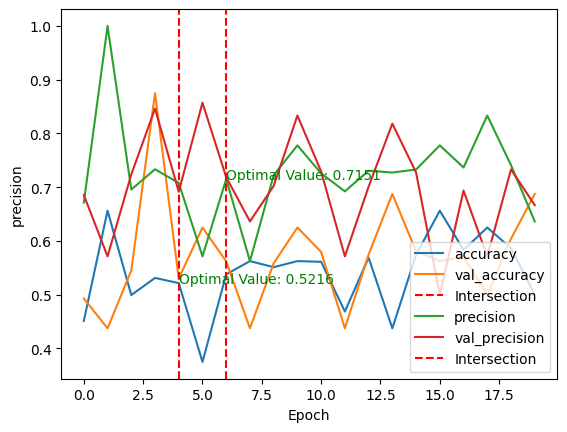

In [22]:
import matplotlib.pyplot as plt

def show_performance_curve(training_result, metric, metric_label):

    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf,
                                                validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]

    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
             xy=(intersection_idx, intersection_value),
             xycoords='data',
             fontsize=10,
             color='green')

    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')



show_performance_curve(training_history, 'accuracy', 'accuracy')
show_performance_curve(training_history, 'precision', 'precision')

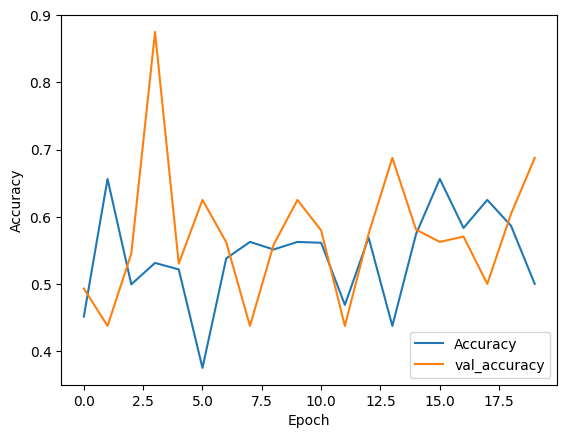

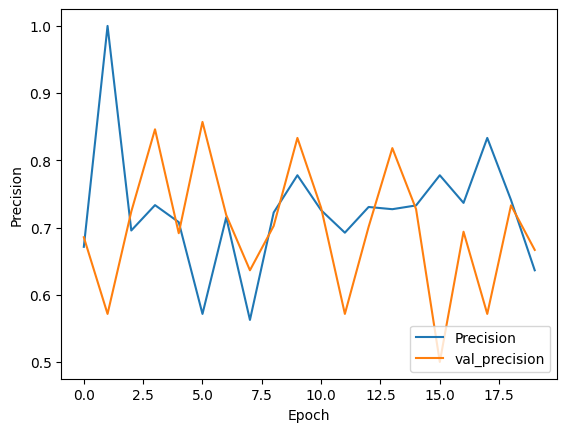

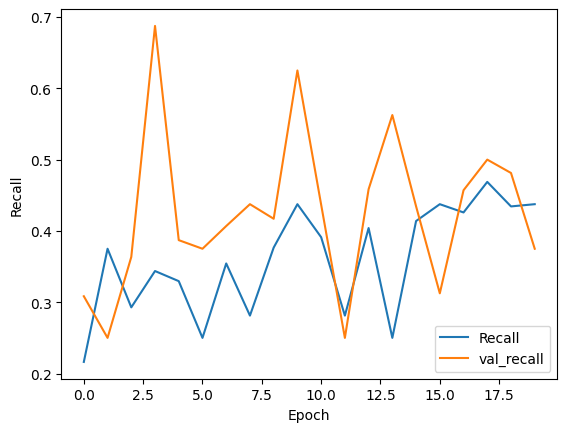

In [23]:
import matplotlib.pyplot as plt

def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[metric]
    validation_perf = training_result.history['val_' + metric]

    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label='val_' + metric)

    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')
    plt.show()

show_performance_curve(training_history, 'accuracy', 'Accuracy')
show_performance_curve(training_history, 'precision', 'Precision')
show_performance_curve(training_history, 'recall', 'Recall')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step


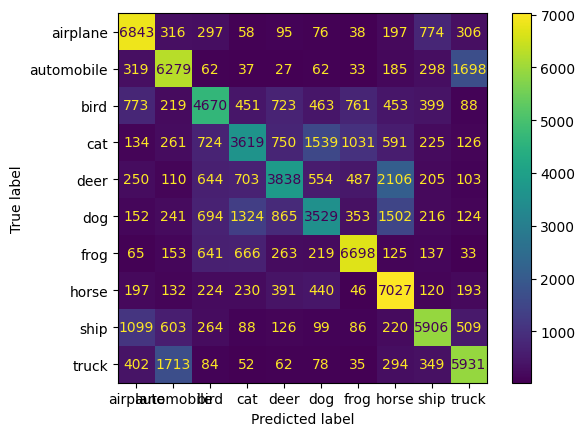

In [24]:
# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_generator)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()

The training metrics of the model across different epochs provide significant insights into the model's performance and convergence behavior. In the first few epochs (up to 5 epochs), the model starts with a validation accuracy of 53.01% and a precision of 69.15%, indicating that while the model is learning, it still struggles to distinguish between classes effectively. The recall at this point is relatively low (32.96%), meaning the model has not yet optimized well for correctly identifying true positives.

By the 10th epoch, there's a noticeable improvement across all metrics. The validation accuracy increases to 62.50%, showing the model is generalizing better to unseen data. Importantly, the precision at this point reaches 83.33%, meaning the model has become more reliable in predicting the correct classes. Similarly, recall improves to 62.50%, indicating that the model is now detecting more true positives. This suggests that the model has learned significantly in the first 10 epochs and is beginning to perform well across both precision and recall.

At the 15th epoch, however, we see some fluctuations in performance. The validation accuracy decreases slightly to 58.08%, while the precision and recall stabilize around 72.73% and 43.45%, respectively. This decline in accuracy and moderate precision might indicate that the model is not improving further, possibly due to overfitting, which is also reflected in the slight increase in validation loss (1.1589).

By the 20th epoch, the validation accuracy reaches 68.75%, which is the highest seen so far. However, the precision falls to 66.67%, suggesting the model is still struggling with consistent predictions. The recall drops to 37.50%, indicating that although the model can correctly classify many samples, it still misses a significant portion of true positives. The increased validation loss suggests the model might still be overfitting to the training data as the epochs progress.

In terms of an optimal solution, it seems that **10 epochs** strike a balance between accuracy (62.50%), precision (83.33%), and recall (62.50%). Beyond this point, there is a risk of overfitting as the validation loss increases, and precision fluctuates. Therefore, the model achieves its best generalization performance around the 10th epoch, where both validation accuracy and precision are relatively high without a significant increase in validation loss.

Thus, based on the training history, the optimal number of epochs for this model appears to be around **10 epochs**, after which the performance either stabilizes or declines slightly. Increasing the epochs further may not lead to significant improvements and may increase the risk of overfitting.